In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pickle

In [3]:
with open('../models/base.pkl', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
duration = 3000.0 # actual duration is 3200ms but we throw away the first 200ms
dt = 1.0

In [5]:
# rates
v_e1 = data['model_results']['net']['v_all_neurons_e']
v_e2 = data['model_results']['net']['v_all_neurons_e2']
v_i1 = data['model_results']['net']['v_all_neurons_i1']
v_i2 = data['model_results']['net']['v_all_neurons_i2']


v_e1 = v_e1[:,200:]
v_e2 = v_e2[:,200:]
v_i1 = v_i1[:,200:]
v_i2 = v_i2[:,200:]


lfp1 = np.sum(v_e1,axis=0)/1000
lfp2 = np.sum(v_e2,axis=0)/1000

inh1 = np.sum(v_i1,axis=0)/1000
inh2 = np.sum(v_i2,axis=0)/1000

# time
t = np.linspace(0,3000,int(3000/dt))

KeyError: 'v_all_neurons_e2'

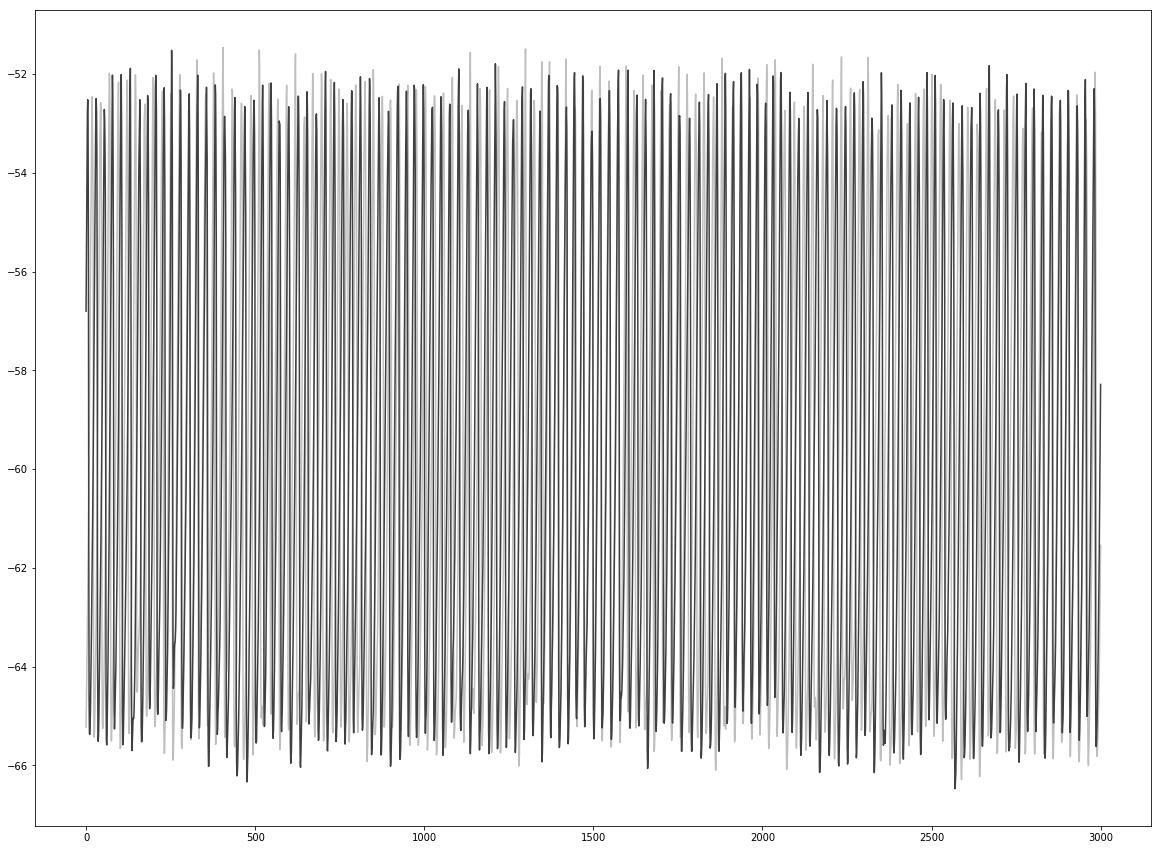

In [413]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.plot(t,lfp1,'0.75')
ax.plot(t,lfp2,'0.25')

(0, 80)

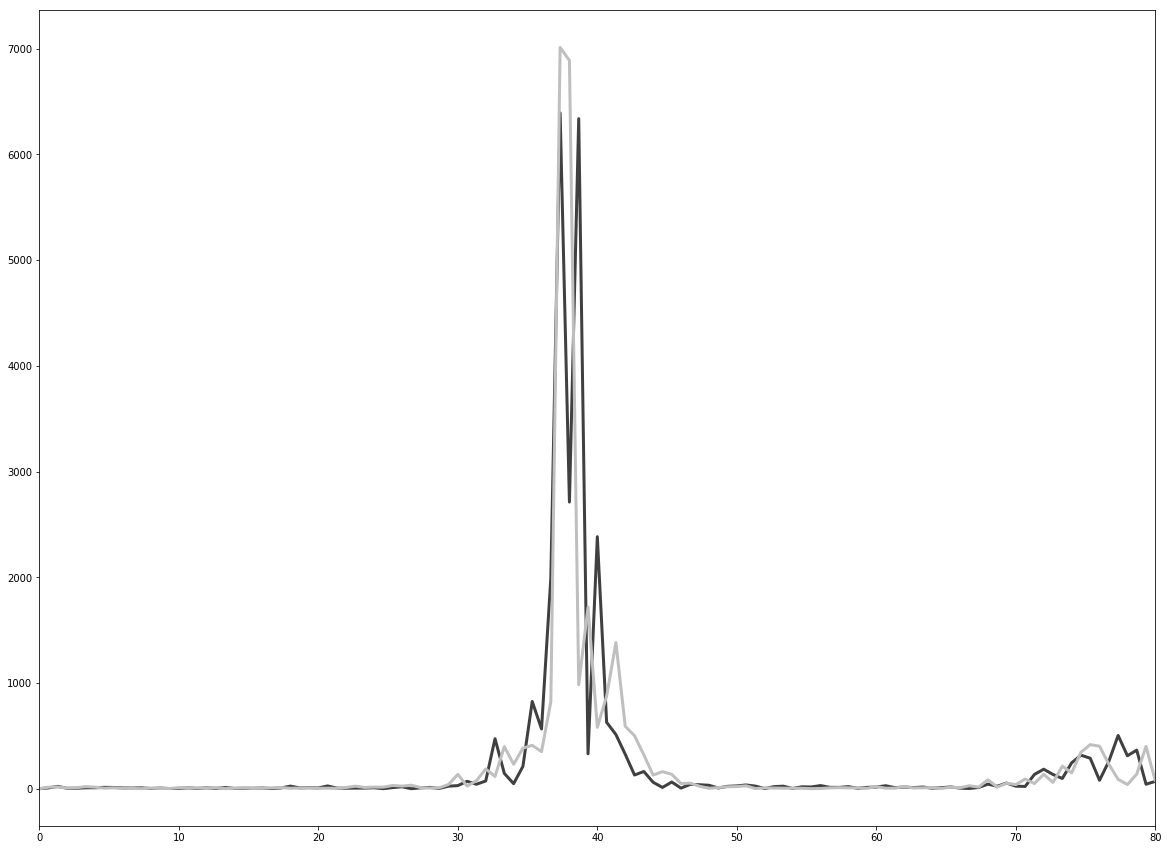

In [414]:
timepoints = int((duration/dt)/2)
fs = 1./dt
psd1,freqs = mlab.psd(lfp1,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)
psd2,_ = mlab.psd(lfp2,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)

psd1[0] = 0.0
psd2[0] = 0.0

fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.plot(freqs*1000,psd1,'0.25',linewidth=3.0)
ax.plot(freqs*1000,psd2,'0.75',linewidth=3.0)
ax.set_xlim([0,80])

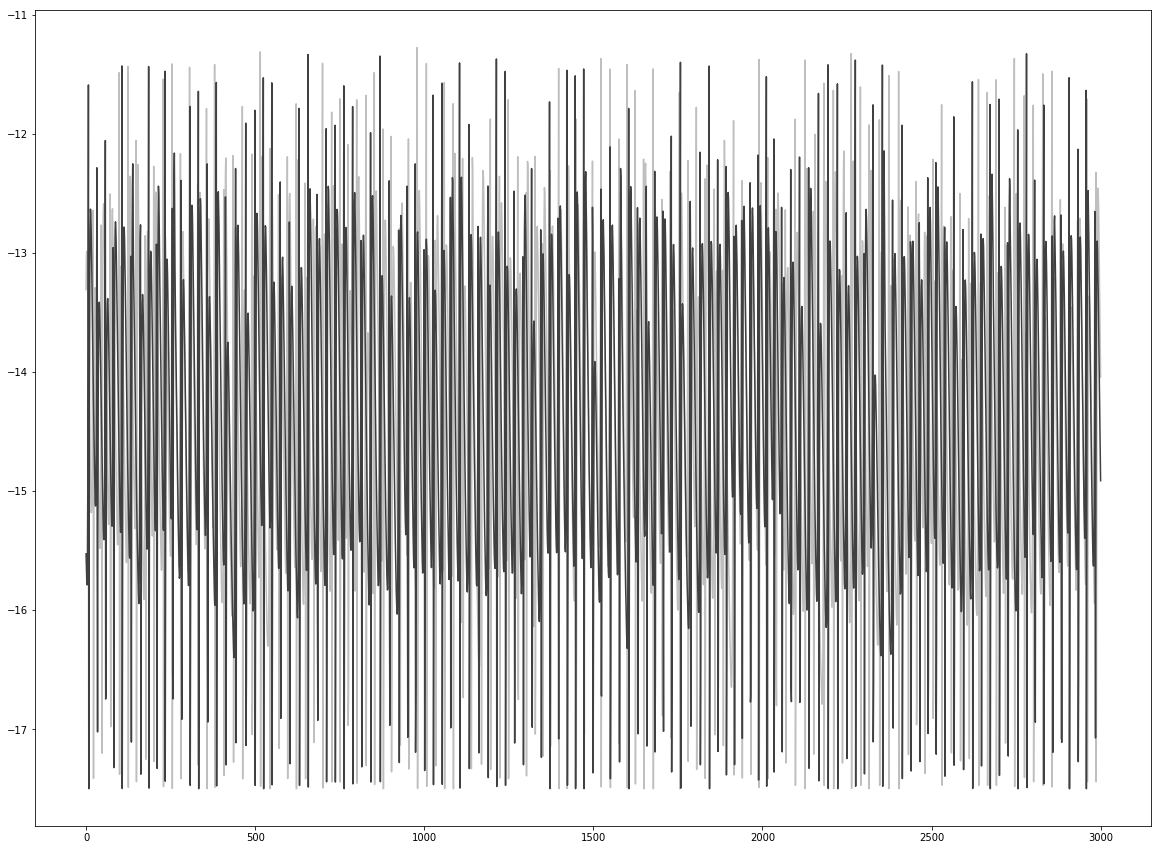

In [415]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.plot(t,inh1,'0.75')
ax.plot(t,inh2,'0.25')

(0, 80)

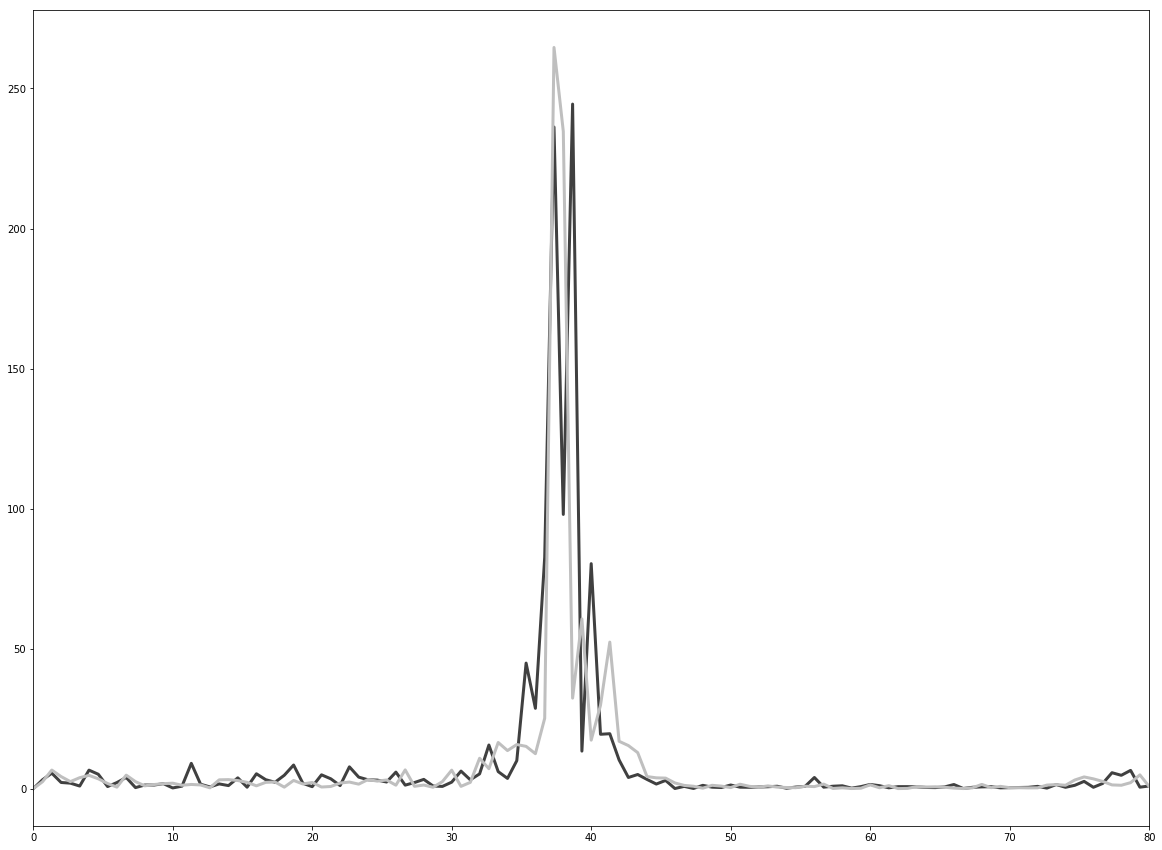

In [416]:
psdi1,freqs = mlab.psd(inh1,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)
psdi2,_ = mlab.psd(inh2,NFFT=int(timepoints),Fs=fs,noverlap=0,window=mlab.window_none)

psdi1[0] = 0.0
psdi2[0] = 0.0

fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.plot(freqs*1000,psdi1,'0.25',linewidth=3.0)
ax.plot(freqs*1000,psdi2,'0.75',linewidth=3.0)
ax.set_xlim([0,80])

In [417]:
# spikes
s_e1 = data['model_results']['net']['net_spikes_e']
s_e2 = data['model_results']['net']['net_spikes_e2']
s_i1 = data['model_results']['net']['net_spikes_i1']
s_i2 = data['model_results']['net']['net_spikes_i2']

(1000, 2000)

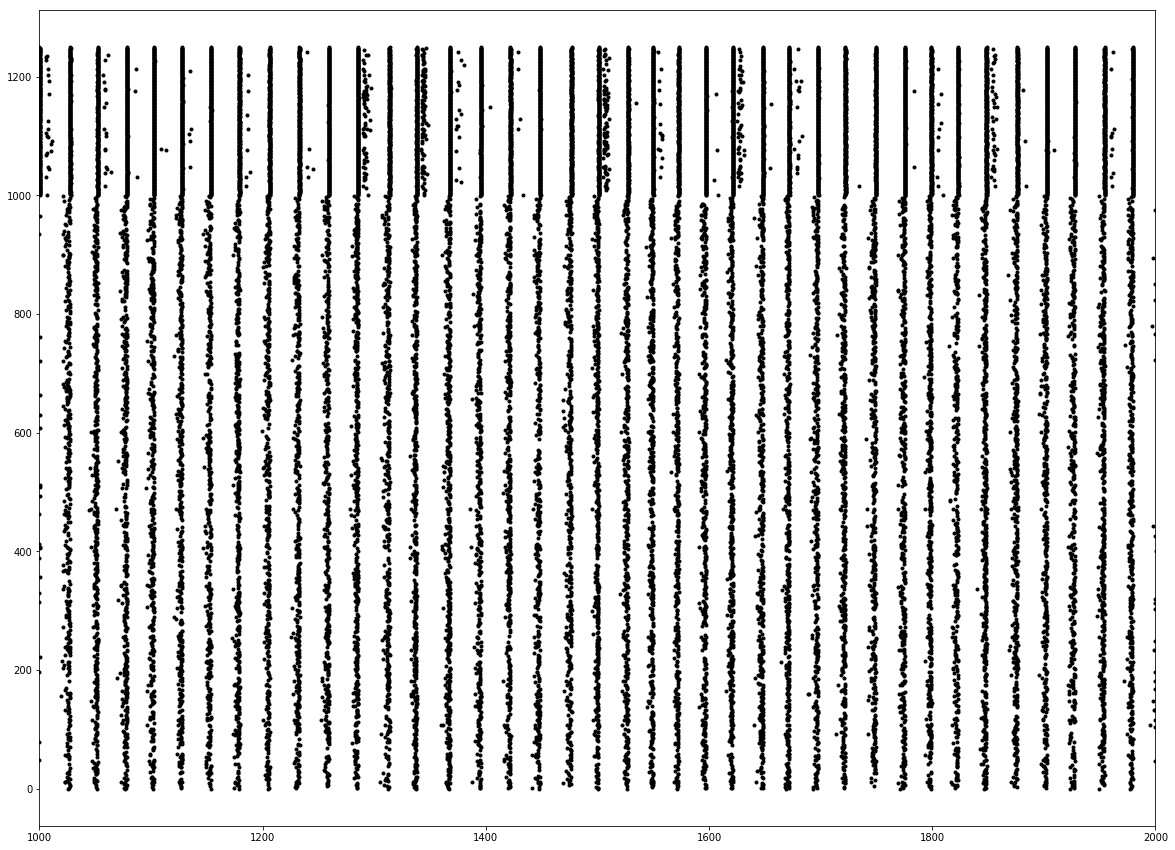

In [418]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.plot(s_e1[1]*1000,s_e1[0],'k.')
ax.plot(s_i1[1]*1000,s_i1[0]+1000,'k.')
ax.set_xlim([1000,2000])

(1000, 2000)

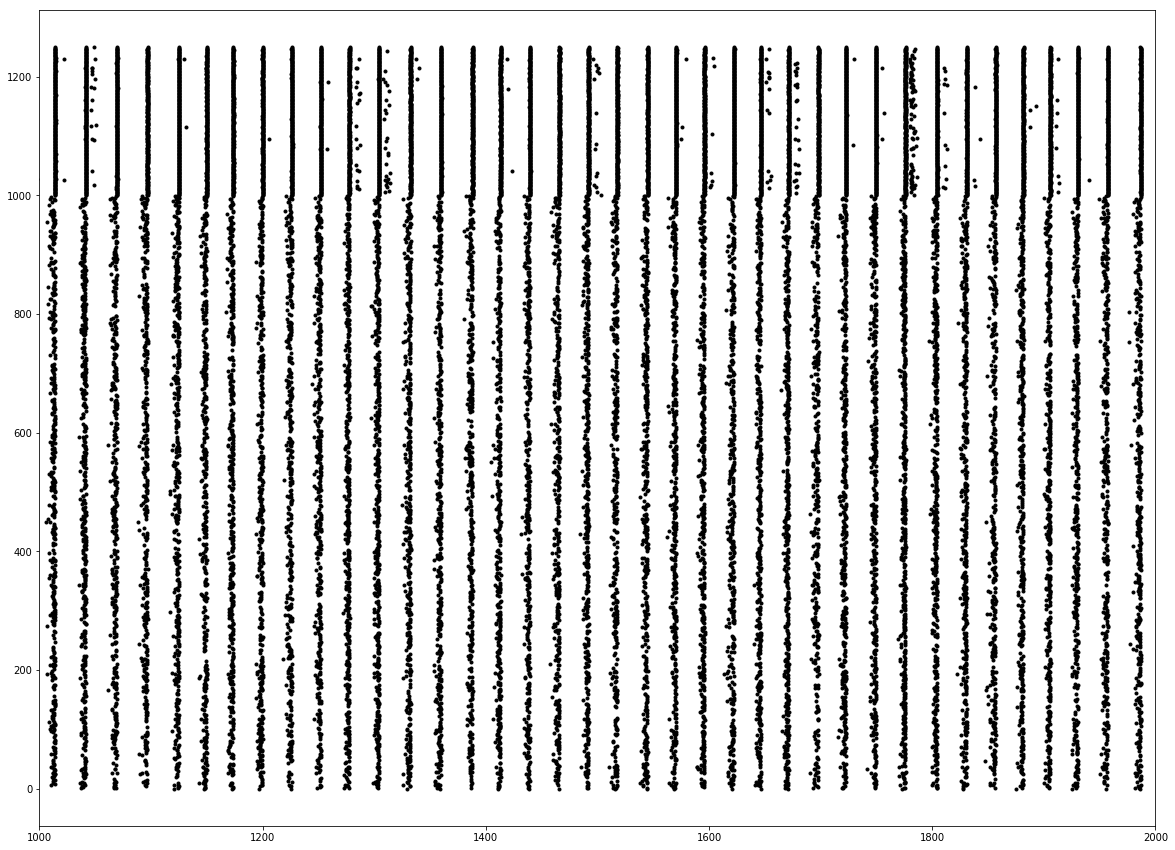

In [419]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.plot(s_e2[1]*1000,s_e2[0],'k.')
ax.plot(s_i2[1]*1000,s_i2[0]+1000,'k.')
ax.set_xlim([1000,2000])

(1000, 1080)

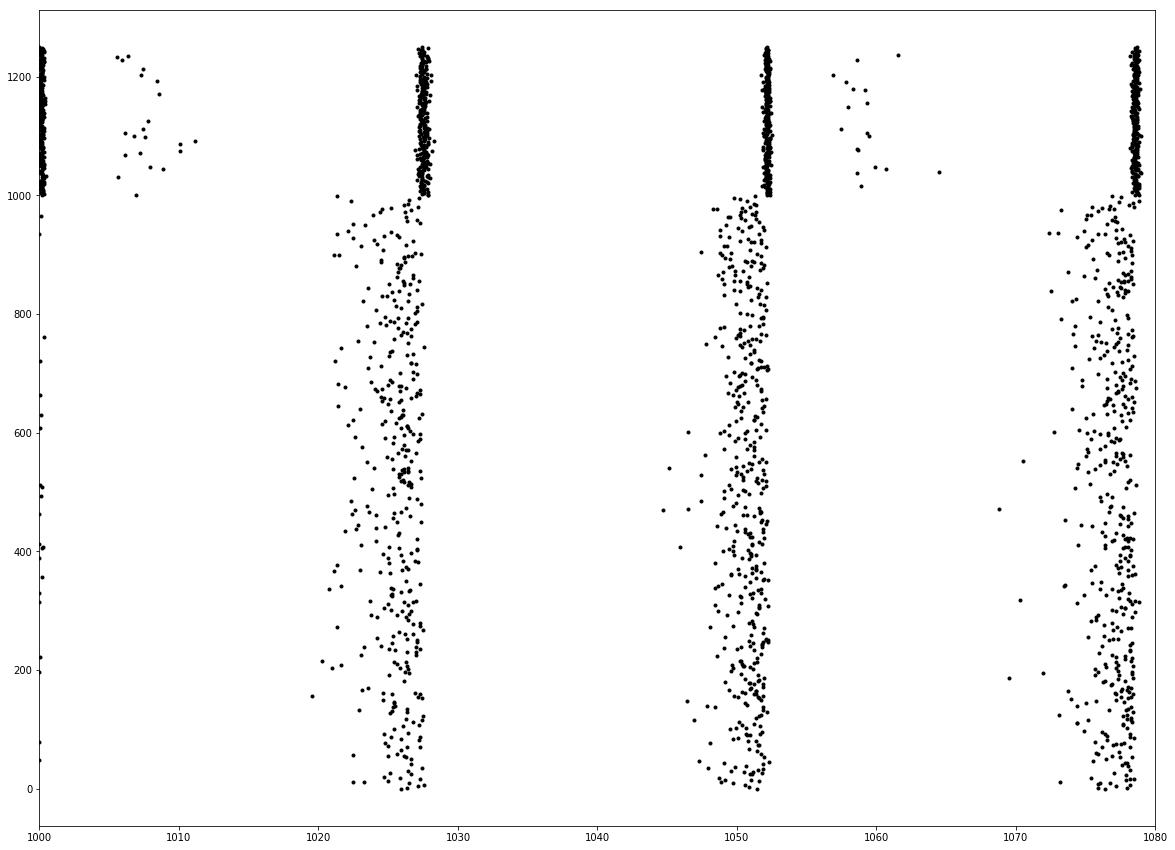

In [420]:
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.plot(s_e1[1]*1000,s_e1[0],'k.')
ax.plot(s_i1[1]*1000,s_i1[0]+1000,'k.')
ax.set_xlim([1000,1080])

I cells (#1001-#1250) fire after E cells (#0-#1000) confirming a PING